## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from PIL import Image
from tensorflow.keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [35]:
path = 'C:\\Users\\Venkat Karthi\\PGP AIML\\Computer Vision - 3\\oxflowers\\jpg'
train_dir_content = os.listdir(path)

for i in range (len(train_dir_content)):   
    current_class_name = train_dir_content[i]
    class_dir = os.path.join(path, current_class_name)
    image_in_class = os.listdir(class_dir)
    print("Number of samples in class named ", current_class_name, ":", len(image_in_class))

Number of samples in class named  0 : 80
Number of samples in class named  1 : 80
Number of samples in class named  10 : 80
Number of samples in class named  11 : 80
Number of samples in class named  12 : 80
Number of samples in class named  13 : 80
Number of samples in class named  14 : 80
Number of samples in class named  15 : 80
Number of samples in class named  16 : 80
Number of samples in class named  2 : 80
Number of samples in class named  3 : 80
Number of samples in class named  4 : 80
Number of samples in class named  5 : 80
Number of samples in class named  6 : 80
Number of samples in class named  7 : 80
Number of samples in class named  8 : 80
Number of samples in class named  9 : 80


(500, 526, 3)
9


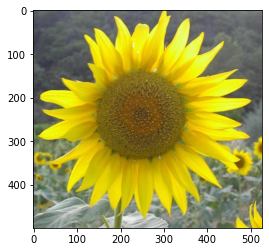

In [36]:
image_file_dir = os.path.join(class_dir, image_in_class[0])
img = preprocessing.image.load_img(image_file_dir)
image_array = preprocessing.image.img_to_array(img)
print(image_array.shape)
image_array = image_array/255.0
print(current_class_name)
plt.imshow(image_array)
plt.show()

## Load images

In [37]:
#load images as np arrays
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224))
#     img = img.resize()# resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

In [50]:
labels=[]
dataset_array = []
for i in range (len(train_dir_content)):
    
    current_class_name = train_dir_content[i]
    class_dir = os.path.join(path, current_class_name)
    images_in_class = os.listdir(class_dir)
    for image_file in images_in_class:
        image_file_dir= os.path.join(class_dir,image_file)

        img = preprocessing.image.load_img(image_file_dir, target_size=(28,28))

        img_array = preprocessing.image.img_to_array(img)

        img_array = img_array/255.0
        img_array = img_array.flatten()
        dataset_array.append(img_array)
        labels.append(current_class_name)
    
    print("Class ", current_class_name, "Array shape :", dataset_array.count)

Class  0 Array shape : <built-in method count of list object at 0x00000270286DAC80>
Class  1 Array shape : <built-in method count of list object at 0x00000270286DAC80>
Class  10 Array shape : <built-in method count of list object at 0x00000270286DAC80>
Class  11 Array shape : <built-in method count of list object at 0x00000270286DAC80>
Class  12 Array shape : <built-in method count of list object at 0x00000270286DAC80>
Class  13 Array shape : <built-in method count of list object at 0x00000270286DAC80>
Class  14 Array shape : <built-in method count of list object at 0x00000270286DAC80>
Class  15 Array shape : <built-in method count of list object at 0x00000270286DAC80>
Class  16 Array shape : <built-in method count of list object at 0x00000270286DAC80>
Class  2 Array shape : <built-in method count of list object at 0x00000270286DAC80>
Class  3 Array shape : <built-in method count of list object at 0x00000270286DAC80>
Class  4 Array shape : <built-in method count of list object at 0x000

In [51]:
dataset_array = np.array(dataset_array)
print( "Array shape :", dataset_array.shape)
df = pd.DataFrame(dataset_array)

Array shape : (1360, 2352)


In [52]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,0.917647,0.917647,0.949020,0.505882,0.486275,0.501961,0.901961,0.894118,0.913725,0.780392,...,0.200000,0.039216,0.058824,0.035294,0.058824,0.066667,0.054902,0.160784,0.203922,0.149020
1,0.200000,0.180392,0.203922,0.196078,0.168627,0.200000,0.388235,0.364706,0.411765,0.352941,...,0.227451,0.298039,0.235294,0.184314,0.094118,0.082353,0.062745,0.176471,0.141176,0.074510
2,0.160784,0.168627,0.113725,0.180392,0.164706,0.121569,0.286275,0.286275,0.239216,0.513726,...,0.435294,0.313726,0.505882,0.482353,0.290196,0.427451,0.411765,0.239216,0.250980,0.207843
3,0.709804,0.537255,0.596078,0.701961,0.552941,0.603922,0.674510,0.525490,0.576471,0.658824,...,0.564706,0.337255,0.411765,0.439216,0.490196,0.482353,0.494118,0.603922,0.509804,0.572549
4,0.109804,0.168627,0.007843,0.713726,0.631373,0.180392,0.600000,0.521569,0.082353,0.149020,...,0.003922,0.227451,0.176471,0.101961,0.301961,0.356863,0.156863,0.447059,0.509804,0.266667


In [53]:
df.shape

(1360, 2352)

In [54]:
df['label'] = labels

In [55]:
df1 = df.copy()

## Train test split

In [56]:
X = df.drop('label', axis = 1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Supervised Learning

In [57]:
sl_model = svm.SVC(gamma=0.01, C=10) 
sl_model.fit(X_train , y_train)
y_pred = sl_model.predict(X_test)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5024509803921569


## Neural Network

In [59]:
y = pd.get_dummies(df1.label, prefix='plant')
X = df1.drop('label', axis = 1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def nn_model(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 17
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(2352,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=100, verbose= 1)

In [70]:
def nn_model1(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 17

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(2352,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=100, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

#### Lambda(small regularization) = 1e-7, learning rate = 1e-7

In [71]:
lr = 1e-7
Lambda = 1e-7
nn_model(20, lr, Lambda)

Epoch 1/20
10/10 [==============================] - 0s 4ms/step - loss: 2.8840 - accuracy: 0.0662
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: 2.8840 - accuracy: 0.0662
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 2.8840 - accuracy: 0.0662
Epoch 4/20
10/10 [==============================] - 0s 5ms/step - loss: 2.8840 - accuracy: 0.0662
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 2.8840 - accuracy: 0.0662
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 2.8840 - accuracy: 0.0662
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 2.8839 - accuracy: 0.0662
Epoch 8/20
10/10 [==============================] - 0s 5ms/step - loss: 2.8839 - accuracy: 0.0662
Epoch 9/20
10/10 [==============================] - 0s 5ms/step - loss: 2.8839 - accuracy: 0.0662
Epoch 10/20
10/10 [==============================] - 0s 4ms/step - loss: 2.8839 - accuracy: 0.0662
Epoch 11/20
10/10 [

#### Let us attempt by reducing the learning rate to 1e4

In [72]:
lr = 1e4
Lambda = 1e-7
nn_model(20, lr, Lambda)

Epoch 1/20
10/10 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0473
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0609
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0609
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0609
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.0609
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0609
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0609
Epoch 8/20
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.0609
Epoch 9/20
10/10 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0609
Epoch 10/20
10/10 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0609
Epoch 11/20
10/10 [==============================

#### Loss is exploding, accuracy is very low hence run coarse search for 10 times with different lr and Lambda values each with 100 epochs

In [73]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = nn_model1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 2.8505 - accuracy: 0.0798
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 2.6862 - accuracy: 0.2174
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 2.5326 - accuracy: 0.2878
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 2.3507 - accuracy: 0.3246
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 2.1704 - accuracy: 0.3277
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 2.0025 - accuracy: 0.3960
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 1.9021 - accuracy: 0.4212
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 1.8075 - accuracy: 0.4254
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7148 - accuracy: 0.4800
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 1.6307 - accuracy: 0.5084
Epoch 11/

10/10 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 1.0000
Epoch 84/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 1.0000
Epoch 85/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0360 - accuracy: 1.0000
Epoch 86/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0343 - accuracy: 1.0000
Epoch 87/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 1.0000
Epoch 88/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 1.0000
Epoch 89/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 1.0000
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 1.0000
Epoch 91/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 1.0000
Epoch 92/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 1.0000
Epoch 93/100


10/10 [==============================] - 0s 6ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 65/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 1.0000
Epoch 66/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 1.0000
Epoch 67/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 1.0000
Epoch 68/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0207 - accuracy: 1.0000
Epoch 69/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 70/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 71/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 1.0000
Epoch 72/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 73/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 74/100


10/10 [==============================] - 0s 4ms/step - loss: 1.3360 - accuracy: 0.6975
Epoch 46/100
10/10 [==============================] - 0s 5ms/step - loss: 1.3191 - accuracy: 0.6954
Epoch 47/100
10/10 [==============================] - 0s 5ms/step - loss: 1.3052 - accuracy: 0.6838
Epoch 48/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2795 - accuracy: 0.7111
Epoch 49/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2592 - accuracy: 0.7069
Epoch 50/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2511 - accuracy: 0.7027
Epoch 51/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2305 - accuracy: 0.7290
Epoch 52/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2116 - accuracy: 0.7164
Epoch 53/100
10/10 [==============================] - 0s 4ms/step - loss: 1.1926 - accuracy: 0.7353
Epoch 54/100
10/10 [==============================] - 0s 4ms/step - loss: 1.1805 - accuracy: 0.7353
Epoch 55/100


10/10 [==============================] - 0s 3ms/step - loss: 2.8573 - accuracy: 0.0557
Epoch 26/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8560 - accuracy: 0.0557
Epoch 27/100
10/10 [==============================] - 0s 4ms/step - loss: 2.8547 - accuracy: 0.0567
Epoch 28/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8534 - accuracy: 0.0567
Epoch 29/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8522 - accuracy: 0.0567
Epoch 30/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8509 - accuracy: 0.0588
Epoch 31/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8497 - accuracy: 0.0578
Epoch 32/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8484 - accuracy: 0.0567
Epoch 33/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8472 - accuracy: 0.0567
Epoch 34/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8459 - accuracy: 0.0557
Epoch 35/100


10/10 [==============================] - 0s 4ms/step - loss: 2.9339 - accuracy: 0.0683
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 2.9312 - accuracy: 0.0714
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 2.9284 - accuracy: 0.0714
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 2.9258 - accuracy: 0.0704
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 2.9234 - accuracy: 0.0672
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9208 - accuracy: 0.0672
Epoch 11/100
10/10 [==============================] - 0s 4ms/step - loss: 2.9185 - accuracy: 0.0683
Epoch 12/100
10/10 [==============================] - 0s 4ms/step - loss: 2.9161 - accuracy: 0.0693
Epoch 13/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9138 - accuracy: 0.0693
Epoch 14/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9116 - accuracy: 0.0704
Epoch 15/100
10/1

10/10 [==============================] - 0s 4ms/step - loss: 2.8127 - accuracy: 0.1334
Epoch 88/100
10/10 [==============================] - 0s 4ms/step - loss: 2.8117 - accuracy: 0.1345
Epoch 89/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8108 - accuracy: 0.1355
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8098 - accuracy: 0.1387
Epoch 91/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8088 - accuracy: 0.1387
Epoch 92/100
10/10 [==============================] - 0s 4ms/step - loss: 2.8078 - accuracy: 0.1376
Epoch 93/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8069 - accuracy: 0.1387
Epoch 94/100
10/10 [==============================] - 0s 4ms/step - loss: 2.8059 - accuracy: 0.1408
Epoch 95/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8049 - accuracy: 0.1408
Epoch 96/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8040 - accuracy: 0.1397
Epoch 97/100


10/10 [==============================] - 0s 4ms/step - loss: 0.1050 - accuracy: 1.0000
Epoch 68/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 1.0000
Epoch 69/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1037 - accuracy: 1.0000
Epoch 70/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 1.0000
Epoch 71/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 1.0000
Epoch 72/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 1.0000
Epoch 73/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1006 - accuracy: 1.0000
Epoch 74/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1001 - accuracy: 1.0000
Epoch 75/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 1.0000
Epoch 76/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 1.0000
Epoch 77/100


10/10 [==============================] - 0s 3ms/step - loss: 2.7228 - accuracy: 0.1397
Epoch 49/100
10/10 [==============================] - 0s 3ms/step - loss: 2.7201 - accuracy: 0.1397
Epoch 50/100
10/10 [==============================] - 0s 3ms/step - loss: 2.7175 - accuracy: 0.1460
Epoch 51/100
10/10 [==============================] - 0s 4ms/step - loss: 2.7149 - accuracy: 0.1502
Epoch 52/100
10/10 [==============================] - 0s 4ms/step - loss: 2.7123 - accuracy: 0.1502
Epoch 53/100
10/10 [==============================] - 0s 3ms/step - loss: 2.7098 - accuracy: 0.1523
Epoch 54/100
10/10 [==============================] - 0s 3ms/step - loss: 2.7072 - accuracy: 0.1597
Epoch 55/100
10/10 [==============================] - 0s 3ms/step - loss: 2.7046 - accuracy: 0.1691
Epoch 56/100
10/10 [==============================] - 0s 3ms/step - loss: 2.7020 - accuracy: 0.1723
Epoch 57/100
10/10 [==============================] - 0s 3ms/step - loss: 2.6996 - accuracy: 0.1786
Epoch 58/100


10/10 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0609
Epoch 30/100
10/10 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0609
Epoch 31/100
10/10 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0609
Epoch 32/100
10/10 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0609
Epoch 33/100
10/10 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0609
Epoch 34/100
10/10 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0609
Epoch 35/100
10/10 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0609
Epoch 36/100
10/10 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0609
Epoch 37/100
10/10 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0609
Epoch 38/100
10/10 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0609
Epoch 39/100
10/10 [=======================

10/10 [==============================] - 0s 3ms/step - loss: 2.7316 - accuracy: 0.1450
Epoch 12/100
10/10 [==============================] - 0s 4ms/step - loss: 2.7205 - accuracy: 0.1523
Epoch 13/100
10/10 [==============================] - 0s 4ms/step - loss: 2.7094 - accuracy: 0.1649
Epoch 14/100
10/10 [==============================] - 0s 4ms/step - loss: 2.6991 - accuracy: 0.1754
Epoch 15/100
10/10 [==============================] - 0s 4ms/step - loss: 2.6889 - accuracy: 0.1912
Epoch 16/100
10/10 [==============================] - 0s 4ms/step - loss: 2.6789 - accuracy: 0.1996
Epoch 17/100
10/10 [==============================] - 0s 4ms/step - loss: 2.6690 - accuracy: 0.2227
Epoch 18/100
10/10 [==============================] - 0s 5ms/step - loss: 2.6594 - accuracy: 0.2248
Epoch 19/100
10/10 [==============================] - 0s 6ms/step - loss: 2.6500 - accuracy: 0.2195
Epoch 20/100
10/10 [==============================] - 0s 4ms/step - loss: 2.6410 - accuracy: 0.2258
Epoch 21/100


10/10 [==============================] - 0s 4ms/step - loss: 2.0738 - accuracy: 0.4086
Epoch 94/100
10/10 [==============================] - 0s 4ms/step - loss: 2.0677 - accuracy: 0.4107
Epoch 95/100
10/10 [==============================] - 0s 4ms/step - loss: 2.0622 - accuracy: 0.4107
Epoch 96/100
10/10 [==============================] - 0s 4ms/step - loss: 2.0565 - accuracy: 0.4149
Epoch 97/100
10/10 [==============================] - 0s 4ms/step - loss: 2.0505 - accuracy: 0.4181
Epoch 98/100
10/10 [==============================] - 0s 4ms/step - loss: 2.0450 - accuracy: 0.4139
Epoch 99/100
10/10 [==============================] - 0s 4ms/step - loss: 2.0397 - accuracy: 0.4170
Epoch 100/100
10/10 [==============================] - 0s 4ms/step - loss: 2.0337 - accuracy: 0.4244
Try 9/100: Best_val_acc: [2.0295028686523438, 0.4264705777168274], lr: 0.0001689916414285092, Lambda: 0.00022923187089745817



#### Now we shall witness increase in accuracy rate, hence we will go for more finer search

In [74]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = nn_model1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 2.7513 - accuracy: 0.1061
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2824 - accuracy: 0.2279
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 2.0705 - accuracy: 0.2973
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7922 - accuracy: 0.4034
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.4822 - accuracy: 0.5137
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 1.3772 - accuracy: 0.5504
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 1.1597 - accuracy: 0.6208
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0011 - accuracy: 0.6597
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9610 - accuracy: 0.6870
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9531 - accuracy: 0.6975
Epoch 11/

10/10 [==============================] - 0s 4ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 84/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 85/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 86/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 87/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 88/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 89/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 90/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 91/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 92/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 93/100


10/10 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 1.0000
Epoch 65/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1108 - accuracy: 1.0000
Epoch 66/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1094 - accuracy: 1.0000
Epoch 67/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1077 - accuracy: 1.0000
Epoch 68/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1063 - accuracy: 1.0000
Epoch 69/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 1.0000
Epoch 70/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1040 - accuracy: 1.0000
Epoch 71/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1026 - accuracy: 1.0000
Epoch 72/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 1.0000
Epoch 73/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1005 - accuracy: 1.0000
Epoch 74/100


10/10 [==============================] - 0s 4ms/step - loss: 1.4340 - accuracy: 0.6513
Epoch 46/100
10/10 [==============================] - 0s 4ms/step - loss: 1.4169 - accuracy: 0.6376
Epoch 47/100
10/10 [==============================] - 0s 3ms/step - loss: 1.3982 - accuracy: 0.6639
Epoch 48/100
10/10 [==============================] - 0s 4ms/step - loss: 1.3894 - accuracy: 0.6471
Epoch 49/100
10/10 [==============================] - 0s 4ms/step - loss: 1.3632 - accuracy: 0.6523
Epoch 50/100
10/10 [==============================] - 0s 4ms/step - loss: 1.3540 - accuracy: 0.6607
Epoch 51/100
10/10 [==============================] - 0s 3ms/step - loss: 1.3310 - accuracy: 0.6733
Epoch 52/100
10/10 [==============================] - 0s 4ms/step - loss: 1.3154 - accuracy: 0.6786
Epoch 53/100
10/10 [==============================] - 0s 4ms/step - loss: 1.3024 - accuracy: 0.6796
Epoch 54/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2916 - accuracy: 0.6786
Epoch 55/100


10/10 [==============================] - 0s 4ms/step - loss: 2.3655 - accuracy: 0.3141
Epoch 26/100
10/10 [==============================] - 0s 4ms/step - loss: 2.3455 - accuracy: 0.3162
Epoch 27/100
10/10 [==============================] - 0s 4ms/step - loss: 2.3260 - accuracy: 0.3288
Epoch 28/100
10/10 [==============================] - 0s 4ms/step - loss: 2.3069 - accuracy: 0.3351
Epoch 29/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2884 - accuracy: 0.3519
Epoch 30/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2701 - accuracy: 0.3466
Epoch 31/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2510 - accuracy: 0.3435
Epoch 32/100
10/10 [==============================] - 0s 4ms/step - loss: 2.2334 - accuracy: 0.3603
Epoch 33/100
10/10 [==============================] - 0s 3ms/step - loss: 2.2158 - accuracy: 0.3666
Epoch 34/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1974 - accuracy: 0.3687
Epoch 35/100


In [76]:
lr = 0.001
Lambda = 0.0001
nn_model1(100, lr, Lambda)

Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 2.9059 - accuracy: 0.0578
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 2.8257 - accuracy: 0.0956
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 2.7735 - accuracy: 0.1334
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 2.7279 - accuracy: 0.1723
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 2.6857 - accuracy: 0.1933
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.6441 - accuracy: 0.2248
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 2.6018 - accuracy: 0.2500
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 2.5569 - accuracy: 0.2574
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 2.5124 - accuracy: 0.2605
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 2.4673 - accuracy: 0.2920
Epoch 11/

10/10 [==============================] - 0s 4ms/step - loss: 0.9548 - accuracy: 0.7910
Epoch 84/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9469 - accuracy: 0.8036
Epoch 85/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9403 - accuracy: 0.7931
Epoch 86/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9210 - accuracy: 0.8078
Epoch 87/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9118 - accuracy: 0.8036
Epoch 88/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9019 - accuracy: 0.8036
Epoch 89/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8879 - accuracy: 0.8193
Epoch 90/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8780 - accuracy: 0.8162
Epoch 91/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8699 - accuracy: 0.8141
Epoch 92/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8601 - accuracy: 0.8183
Epoch 93/100


[0.7663334012031555, 0.8518907427787781]

## Computer Vision

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [78]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
   path,
    validation_split=0.2, #80% training
    subset="training",
    seed=123,
    image_size=(128,128),
    batch_size=32)


Found 1360 files belonging to 17 classes.
Using 1088 files for training.


In [79]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2, #20% validation
    subset="validation",
    seed=123,
    image_size=(128,128),
    batch_size=32)

Found 1360 files belonging to 17 classes.
Using 272 files for validation.


In [81]:
class_names = train_ds.class_names

## Display few images with filters

<ipython-input-82-cd5d0c0e5a7b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, i + 1)


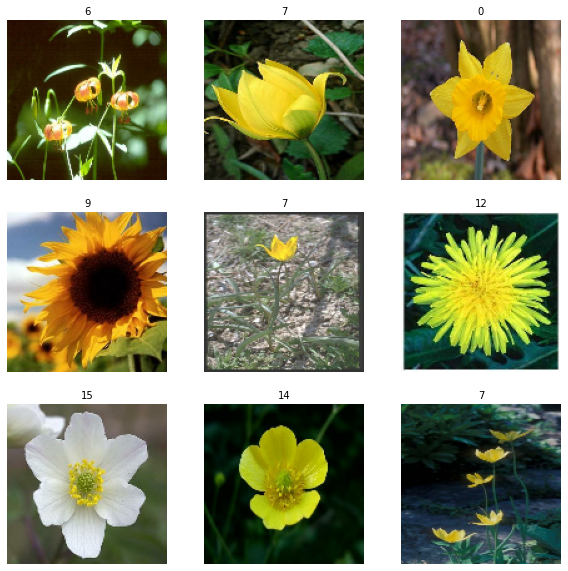

In [82]:
fig = plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(3):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.title(class_names[labels[i]], fontsize=10)
        plt.imshow(images[i].numpy().astype("uint8"))
        ax = plt.axis("off")

In [83]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) #lambda
image_batch, labels_batch = next(iter(normalized_ds))

first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 1.0


In [84]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(128, 
                                                              128,
                                                              3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

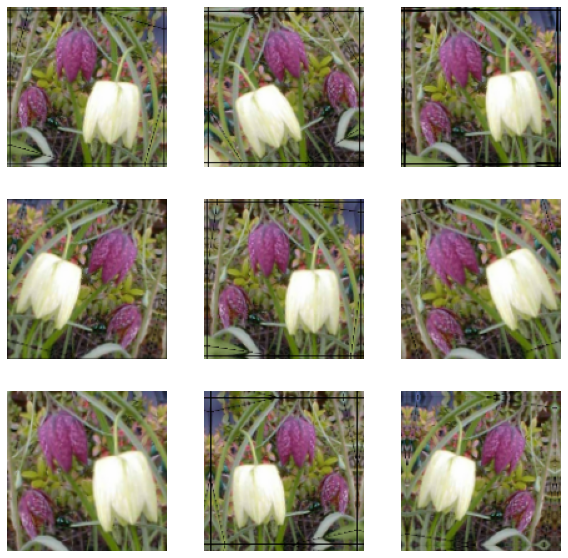

In [88]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        ax = plt.axis("off")

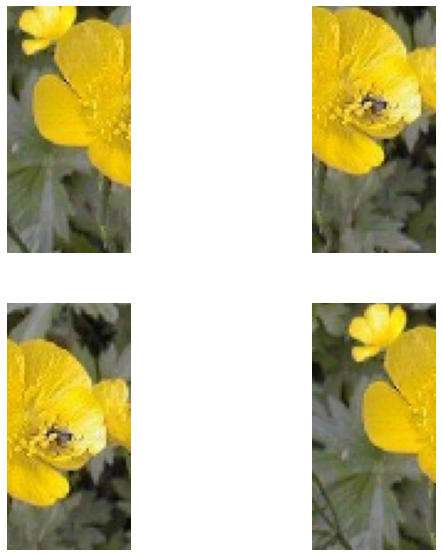

In [89]:
data_augmentation1 = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomCrop(100,50,3)
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(4):
        augmented_images1 = data_augmentation1(images)
        plt.subplot(2,2, i + 1)
        plt.imshow(augmented_images1[0].numpy().astype("uint8"))
        ax = plt.axis("off")

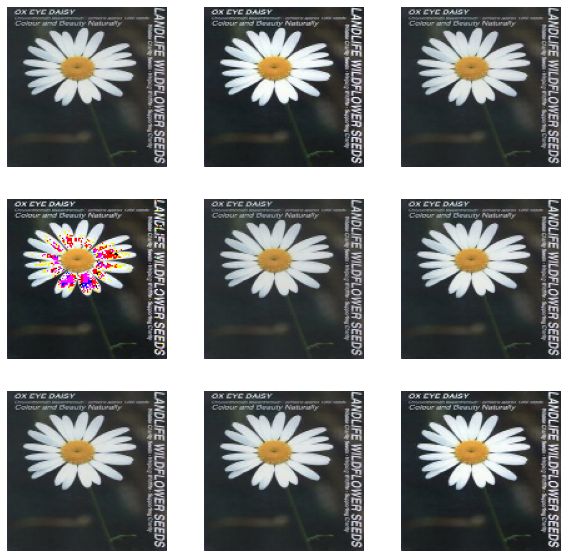

In [90]:
data_augmentation2 = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomContrast(.2,.2)
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images2 = data_augmentation2(images)
        plt.subplot(3,3, i + 1)
        plt.imshow(augmented_images2[0].numpy().astype("uint8"))
        ax = plt.axis("off")

## Model

In [95]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(128,128,3,))) # Input layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.GlobalMaxPool2D()) # Global Max Pool layer
model.add(tf.keras.layers.Flatten()) # Dense Layers after flattening the data
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) # Dropout
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
model.add(tf.keras.layers.Dense(17, activation='softmax')) # Add Output Layer

In [96]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model summary

In [97]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 63, 63, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 128)     

## Fit the model

In [98]:
epochs = 15 #the cycle
activity = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15
34/34 [==============================] - 26s 752ms/step - loss: 2.7752 - accuracy: 0.1590 - val_loss: 2.8105 - val_accuracy: 0.1066
Epoch 2/15
34/34 [==============================] - 25s 723ms/step - loss: 2.6492 - accuracy: 0.3263 - val_loss: 2.7066 - val_accuracy: 0.2022
Epoch 3/15
34/34 [==============================] - 25s 721ms/step - loss: 2.5608 - accuracy: 0.4145 - val_loss: 2.7434 - val_accuracy: 0.1691
Epoch 4/15
34/34 [==============================] - 25s 734ms/step - loss: 2.4954 - accuracy: 0.4752 - val_loss: 2.5456 - val_accuracy: 0.3713
Epoch 5/15
34/34 [==============================] - 25s 728ms/step - loss: 2.4342 - accuracy: 0.5230 - val_loss: 2.4670 - val_accuracy: 0.4779
Epoch 6/15
34/34 [==============================] - 25s 730ms/step - loss: 2.3783 - accuracy: 0.6149 - val_loss: 2.4192 - val_accuracy: 0.5368
Epoch 7/15
34/34 [==============================] - 25s 748ms/step - loss: 2.3427 - accuracy: 0.6369 - val_loss: 2.4109 - val_accuracy: 0.5441

## Accuracy and loss plot

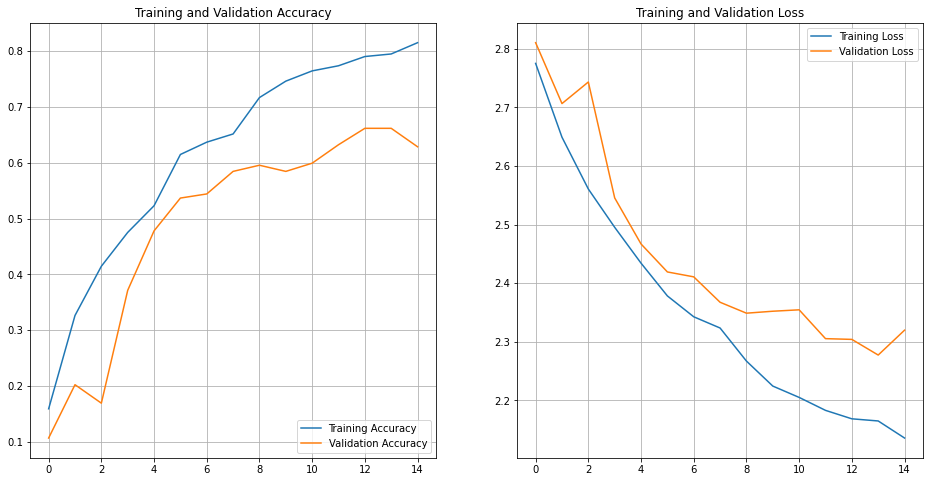

In [100]:
acc = activity.history['accuracy']
val_acc = activity.history['val_accuracy']

loss = activity.history['loss']
val_loss = activity.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()

## Transfer Learning

In [162]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [166]:
# array_dataset = []
# for i in range (len(train_dir_content)):
#     current_class_name = train_dir_content[i]
#     class_dir = os.path.join(path, current_class_name)
#     images_in_class = os.listdir(class_dir)
#     for image_file in images_in_class:
#         array_dataset.append(load_data(os.path.join(class_dir, image_file)))
        
# array_dataset = np.array(array_dataset)


In [167]:
# array_dataset.shape

In [149]:
IMAGE_SIZE = [224, 224]

In [168]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False

In [169]:
x = Flatten()(inception.output)
prediction = Dense(17, activation='softmax')(x)
tf_model = Model(inputs=inception.input, outputs=prediction)
tf_model.summary()

tf_model.compile(
  loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_106 (Conv2D)             (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_106 (BatchN (None, 111, 111, 32) 96          conv2d_106[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_106[0][0]    
_______________________________________________________________________________________

In [170]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(path, 
                                                 target_size = (224, 224),
                                                 subset='training',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = train_datagen.flow_from_directory(path,
                                                 target_size = (224, 224),
                                                 subset='validation',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


In [164]:
indices = dict((v,k) for k,v in training_set.class_indices.items())

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


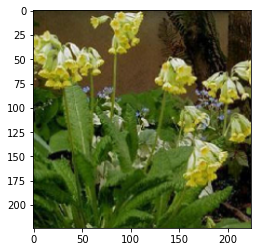

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


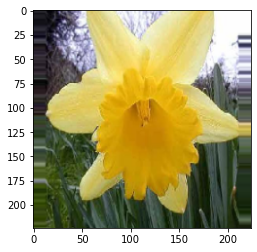

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


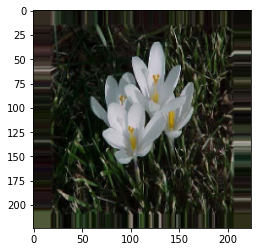

In [171]:
for _ in range(3):
    img, label = training_set.next()
    print(label[0])
    plt.imshow(img[0])
    plt.show()

In [172]:
r = tf_model.fit(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/20
34/34 [==============================] - 38s 1s/step - loss: 6.6293 - accuracy: 0.4982 - val_loss: 1.3542 - val_accuracy: 0.8051
Epoch 2/20
34/34 [==============================] - 37s 1s/step - loss: 1.0411 - accuracy: 0.8392 - val_loss: 0.7374 - val_accuracy: 0.8824
Epoch 3/20
34/34 [==============================] - 38s 1s/step - loss: 0.6229 - accuracy: 0.9062 - val_loss: 1.3583 - val_accuracy: 0.8382
Epoch 4/20
34/34 [==============================] - 38s 1s/step - loss: 0.5364 - accuracy: 0.9145 - val_loss: 1.3373 - val_accuracy: 0.8456
Epoch 5/20
34/34 [==============================] - 39s 1s/step - loss: 0.5482 - accuracy: 0.9256 - val_loss: 1.0112 - val_accuracy: 0.8750
Epoch 6/20
34/34 [==============================] - 40s 1s/step - loss: 0.4768 - accuracy: 0.9246 - val_loss: 1.6992 - val_accuracy: 0.8750
Epoch 7/20
34/34 [==============================] - 40s 1s/step - loss: 0.6133 - accuracy: 0.9237 - val_loss: 1.2206 - val_accuracy: 0.8676
Epoch 8/20
34/34 [==

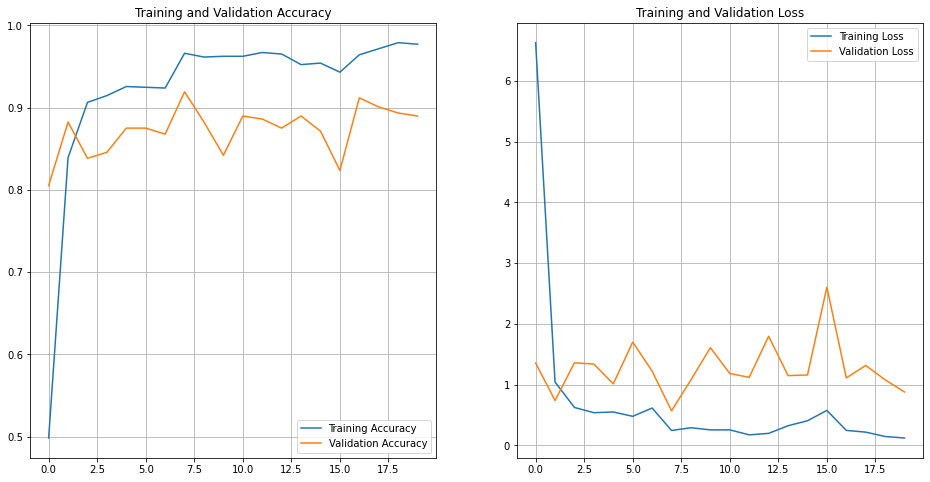

In [175]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()

#### from the above models we can see that CNN using transfer learning has better output compared to CNN without transfer learning which outperforms Neural networks which in tern outperforms supervised learning significantly. Accuracy changes from 0.53 to 0.84 and then to 0.89. The output of CNN can still be improved by changing the layers

## Save weights

In [173]:
tf_model.save('cnn_botanical_model.h5')
tf_model.save_weights('cnn_botanical_model_weights.h5')

## Prediction

In [177]:
data_dir_test_path = 'C:\\Users\\Venkat Karthi\\PGP AIML\\Computer Vision - 3\\oxflowers\\jpg\\0\\image_0001.jpg'

img = preprocessing.image.load_img(data_dir_test_path, target_size=(128, 128))
img_array = preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) #in the format it should be to perform prediction

# plt.imshow(image_array)
# plt.show()
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

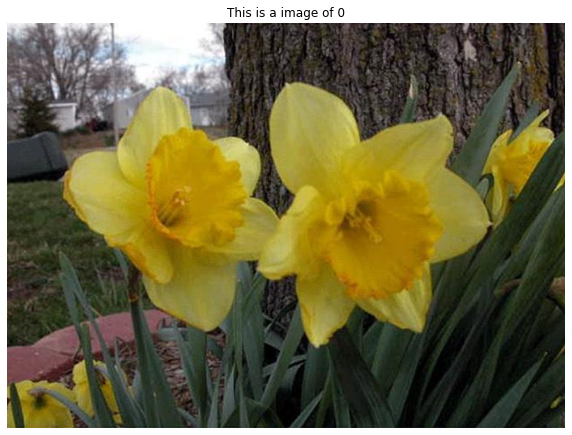

In [117]:
plt.figure(figsize=(10, 10))
plt.title("This is a image of " + (class_names[np.argmax(score)]))
plt.imshow(PIL.Image.open(data_dir_test_path))
ax = plt.axis("off")

## GUI

In [109]:
import tkinter as tk
from tkinter import ttk

In [123]:
win = tk.Tk()
win.title('Classifier - GUI')

Name = ttk.Label(win, text = 'Step 1: File Name')
Name.grid(row = 0, column = 0, sticky = tk.W)

Name_var = tk.StringVar()
Name_entrybox = ttk.Entry(win, width = 30, textvariable = Name_var)
Name_entrybox.grid(row = 0, column = 1)

def Import_Data():
    global df
    DF_Name = Name_var.get()
    try:
        data_dir_test_path = 'C:\\Users\\Venkat Karthi\\PGP AIML\\Computer Vision - 3\\oxflowers\\jpg\\0\\' + DF_Name

        img = preprocessing.image.load_img(data_dir_test_path, target_size=(128, 128))
        img_array = preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)
        confirm = 'Done'
    except:
        confirm = 'File Not found'
    
    confirm_entrybox = ttk.Entry(win, width = 30)
    confirm_entrybox.grid(row = 0, column = 3)
    confirm_entrybox.insert(1, str(confirm))    

Import_Data_Button = ttk.Button(win, text = 'Import Data', command = Import_Data)
Import_Data_Button.grid(row = 0, column = 2)

## NN Regressor
Classifier = ttk.Label(win, text = 'Image Classifier')
Classifier.grid(row = 2, column = 0, sticky = tk.W)

def Predict_Data():
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    confirm = 'class ' + str(class_names[np.argmax(score)])
    
    confirm_entrybox = ttk.Entry(win, width = 30)
    confirm_entrybox.grid(row = 2, column = 3)
    confirm_entrybox.insert(1, str(confirm)) 

Import_Data_Button = ttk.Button(win, text = 'Predict', command = Predict_Data)
Import_Data_Button.grid(row = 2, column = 1)

win.mainloop()

# Part 5

Some of the main stratergies to maintain and support  image classifier  after it in production are as follows
1. We need to retrain the model with new data once in a while
2. We need to monitor the prediction result if it is in the expected range (distribution od prediction is almost similar) and if not we might need to modify the model a little based on current scenario and deploy it again
3. We also need to check if there is any bias towards a particular output. 
4. Constant check of memory is needed with every new data coming
5. finally if the model fails more than expected then we might also need to retrain the model from scratch